# Health Insurance Cost Prediction

#### Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#### Loading the dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
 df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


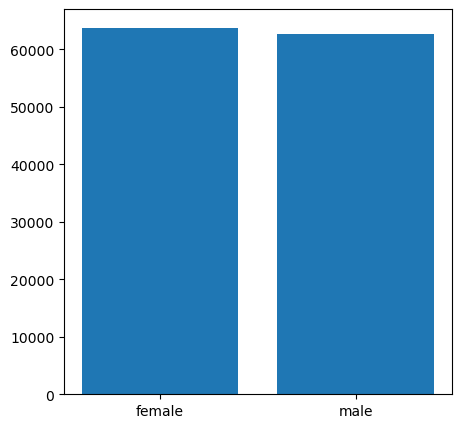

In [8]:
plt.figure(figsize=(5,5))
plt.bar(df['sex'],df['charges'])
plt.show()

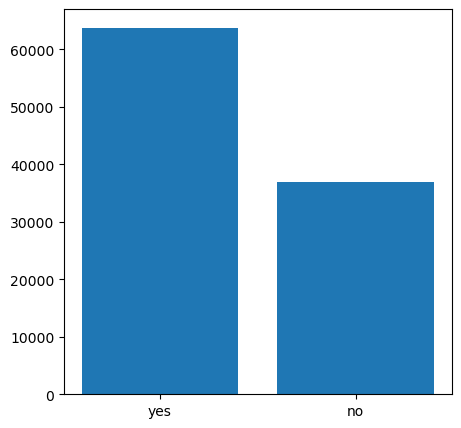

In [9]:
plt.figure(figsize=(5,5))
plt.bar(df['smoker'],df['charges'])
plt.show()

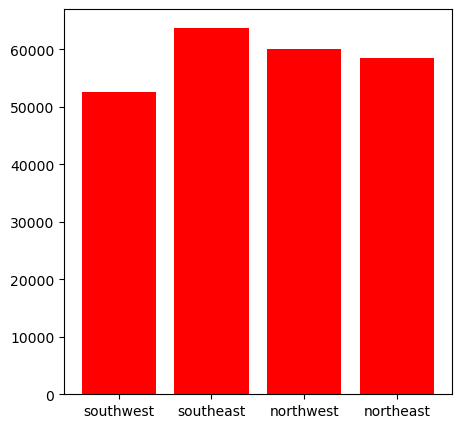

In [10]:
plt.figure(figsize=(5,5))
plt.bar(df['region'],df['charges'], color = 'r')
plt.show()

#### Converting categorical variables into numerical variables 

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['sex'] = df['sex'].map({'female':0,'male':1})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [15]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
df['region'] = df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


#### Store Feature Matrix in X and response in vector Y

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
X = df.drop(['charges'], axis = 1)

In [21]:
y = df['charges']

In [22]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [23]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Splitting the data into two parts : Training and Testing set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [26]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)

In [30]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'rf':y_pred2})

In [31]:
df1

,Actual,Lr,rf
764,9095.06825,8924.407244,11058.433295
887,5272.17580,7116.295018,5035.472220
890,29330.98315,36909.013521,28215.873919
1293,9301.89355,9507.874691,10185.040799
259,33750.29180,27013.350008,34505.055564
...,...,...,...
109,47055.53210,39116.968669,46928.281197
575,12222.89830,11814.555568,13462.089839
535,6067.12675,7638.107736,6559.409044
543,63770.42801,40959.081722,46889.295317


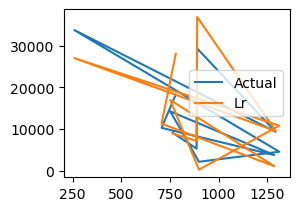

In [34]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['Lr'].iloc[0:11],label = 'Lr')
plt.legend()

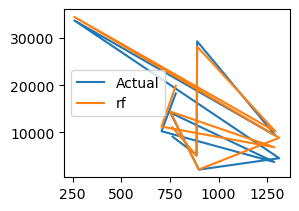

In [35]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['rf'].iloc[0:11],label = 'rf')
plt.legend()

In [36]:
from sklearn import metrics 

In [39]:
score1 =metrics.r2_score(y_test,y_pred1)
score2 =metrics.r2_score(y_test,y_pred2)

In [40]:
print(score1)
print(score2)

0.7833463107364538
0.8629689050168814


In [41]:
metrics.mean_absolute_error(y_test,y_pred1)

4186.5088983664355

In [42]:
metrics.mean_absolute_error(y_test,y_pred2)

2532.7187645397125

#### Conclusion

So, here we see that the Random Forest Regressor predicting the values with 86.2 accuracy 
so we are going to use this model for predicting the charges of insurance

#### Predict Charges for New Customer

In [43]:
data = {'age':19,
        'sex':1,
        'bmi':25.555,
        'children':0,
        'smoker':0,
        'region':3}
df = pd.DataFrame(data,index = [0])
df

,age,sex,bmi,children,smoker,region
0,19,1,25.555,0,0,3


In [44]:
new_pred = rf.predict(df)

In [45]:
print(new_pred)

[1639.336015]


#### As I have taken this data randomly and the actual value of charges is '1632.56445' and predicted one is '1639.336015' is pretty much similar so it show case how well our algorithm works on the data 